# 2 Hidden layer Neural Network
for a classification application with appropriate Learning
Algorithm, output function and loss function.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the features
X = StandardScaler().fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture with 2 hidden layers
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [3]:
# Compile the model
learning_rate = 0.001  # Adjust as needed
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 50  # Adjust as needed
batch_size = 32  # Adjust as needed
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)


Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 0.6545 - accuracy: 0.5912 - val_loss: 0.4988 - val_accuracy: 0.7807
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.8989 - val_loss: 0.3259 - val_accuracy: 0.9737
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.2853 - accuracy: 0.9648 - val_loss: 0.2218 - val_accuracy: 0.9737
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.2039 - accuracy: 0.9692 - val_loss: 0.1598 - val_accuracy: 0.9737
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1577 - accuracy: 0.9714 - val_loss: 0.1232 - val_accuracy: 0.9737
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.9670 - val_loss: 0.1027 - val_accuracy: 0.9825
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.1125 - accuracy: 0.9758 - val_loss: 0.0903 - val_accuracy: 0.9825
Epoch 8/50
15/15 [=

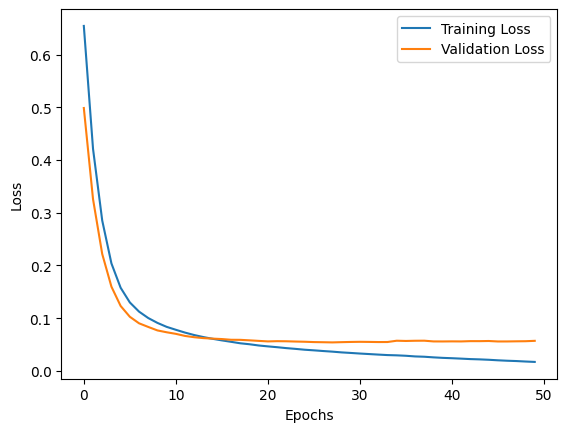

In [4]:
# Print the training history (loss curve)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()